In [65]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

# shared modules
import ds_fun as d
import more_fun as m

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = d.pour_wine()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df = m.rename_col(df)

In [5]:
df.head()

fixed_acidity     volatile_acidity          citric_acid  \
0                 7.40                 0.70                 0.00   
1                 7.80                 0.88                 0.00   
2                 7.80                 0.76                 0.04   
3                11.20                 0.28                 0.56   
4                 7.40                 0.70                 0.00   

        residual_sugar            chlorides  free_sulfur_dioxide  \
0                 1.90                 0.08                11.00   
1                 2.60                 0.10                25.00   
2                 2.30                 0.09                15.00   
3                 1.90                 0.07                17.00   
4                 1.90                 0.08                11.00   

   total_sulfur_dioxide              density                   pH  \
0                 34.00                 1.00                 3.51   
1                 67.00                 1.00                 3.20   
2                 54.00                 1.00                 3.26   
3                 60.00                 1.00                 3.16   
4                 34.00                 1.00                 3.51   

             sulphates              alcohol  quality type  
0                 0.56                 9.40        5  red  
1                 0.68                 9.80        5  red  
2                 0.65                 9.80        5  red  
3                 0.58                 9.80        6  red  
4                 0.56                 9.40        5  red

In [6]:
df.shape

(6497, 13)

In [7]:
df.quality.min(), df.quality.max()

(3, 9)

In [8]:
train, validate, test = d.train_validate(df)

In [9]:
train.shape, validate.shape, test.shape

((3118, 13), (2079, 13), (1300, 13))

In [10]:
#split
#explore on train
#stat tests on train
#choose features to take to modeling
#get to mvp
#maybe save feature engineering until after mvp

In [11]:
train.head()

fixed_acidity     volatile_acidity          citric_acid  \
3094                 7.60                 0.29                 0.49   
2509                 6.30                 0.33                 0.20   
4420                 6.60                 0.40                 0.46   
2677                 6.50                 0.26                 0.34   
2507                 8.00                 0.23                 0.37   

           residual_sugar            chlorides  free_sulfur_dioxide  \
3094                 9.60                 0.03                45.00   
2509                 5.80                 0.04                24.00   
4420                 6.20                 0.06                42.00   
2677                16.30                 0.05                56.00   
2507                 9.60                 0.05                23.00   

      total_sulfur_dioxide              density                   pH  \
3094                197.00                 0.99                 3.13   
2509                144.00                 0.99                 3.15   
4420                241.00                 1.00                 3.50   
2677                197.00                 1.00                 3.49   
2507                159.00                 1.00                 3.32   

                sulphates              alcohol  quality   type  
3094                 0.38                12.30        7  white  
2509                 0.63                 9.90        5  white  
4420                 0.60                 9.90        5  white  
2677                 0.42                 9.80        5  white  
2507                 0.47                 9.80        4  white

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 3094 to 5100
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3118 non-null   float64
 1   volatile_acidity      3118 non-null   float64
 2   citric_acid           3118 non-null   float64
 3   residual_sugar        3118 non-null   float64
 4   chlorides             3118 non-null   float64
 5   free_sulfur_dioxide   3118 non-null   float64
 6   total_sulfur_dioxide  3118 non-null   float64
 7   density               3118 non-null   float64
 8   pH                    3118 non-null   float64
 9   sulphates             3118 non-null   float64
 10  alcohol               3118 non-null   float64
 11  quality               3118 non-null   int64  
 12  type                  3118 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 341.0+ KB


In [15]:
d.outlier_detector(train,'quality')

Empty DataFrame
Columns: [fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, quality, type]
Index: []

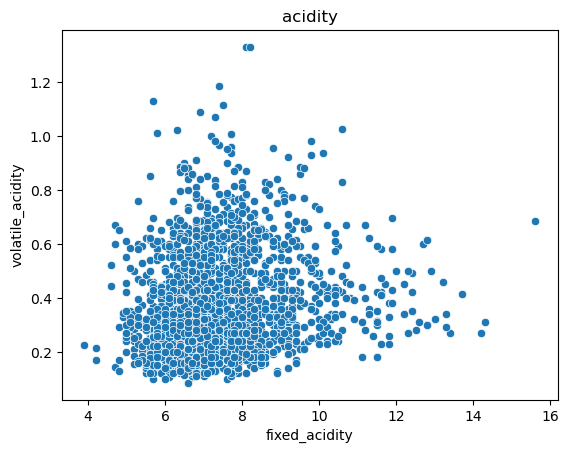

In [21]:
m.scatter_plot(train, train.fixed_acidity, train.volatile_acidity, 'acidity')

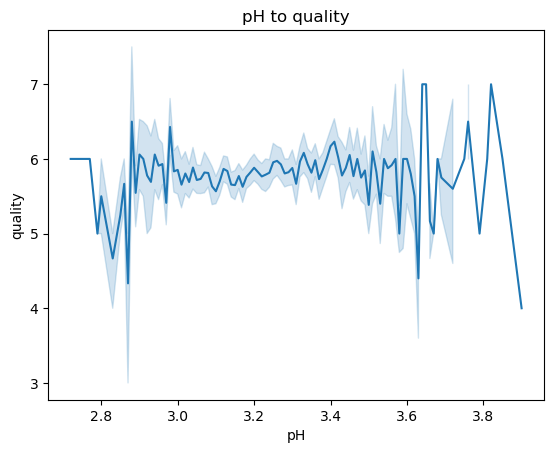

In [22]:
m.line_plot(train, train.pH, train.quality, 'pH to quality')

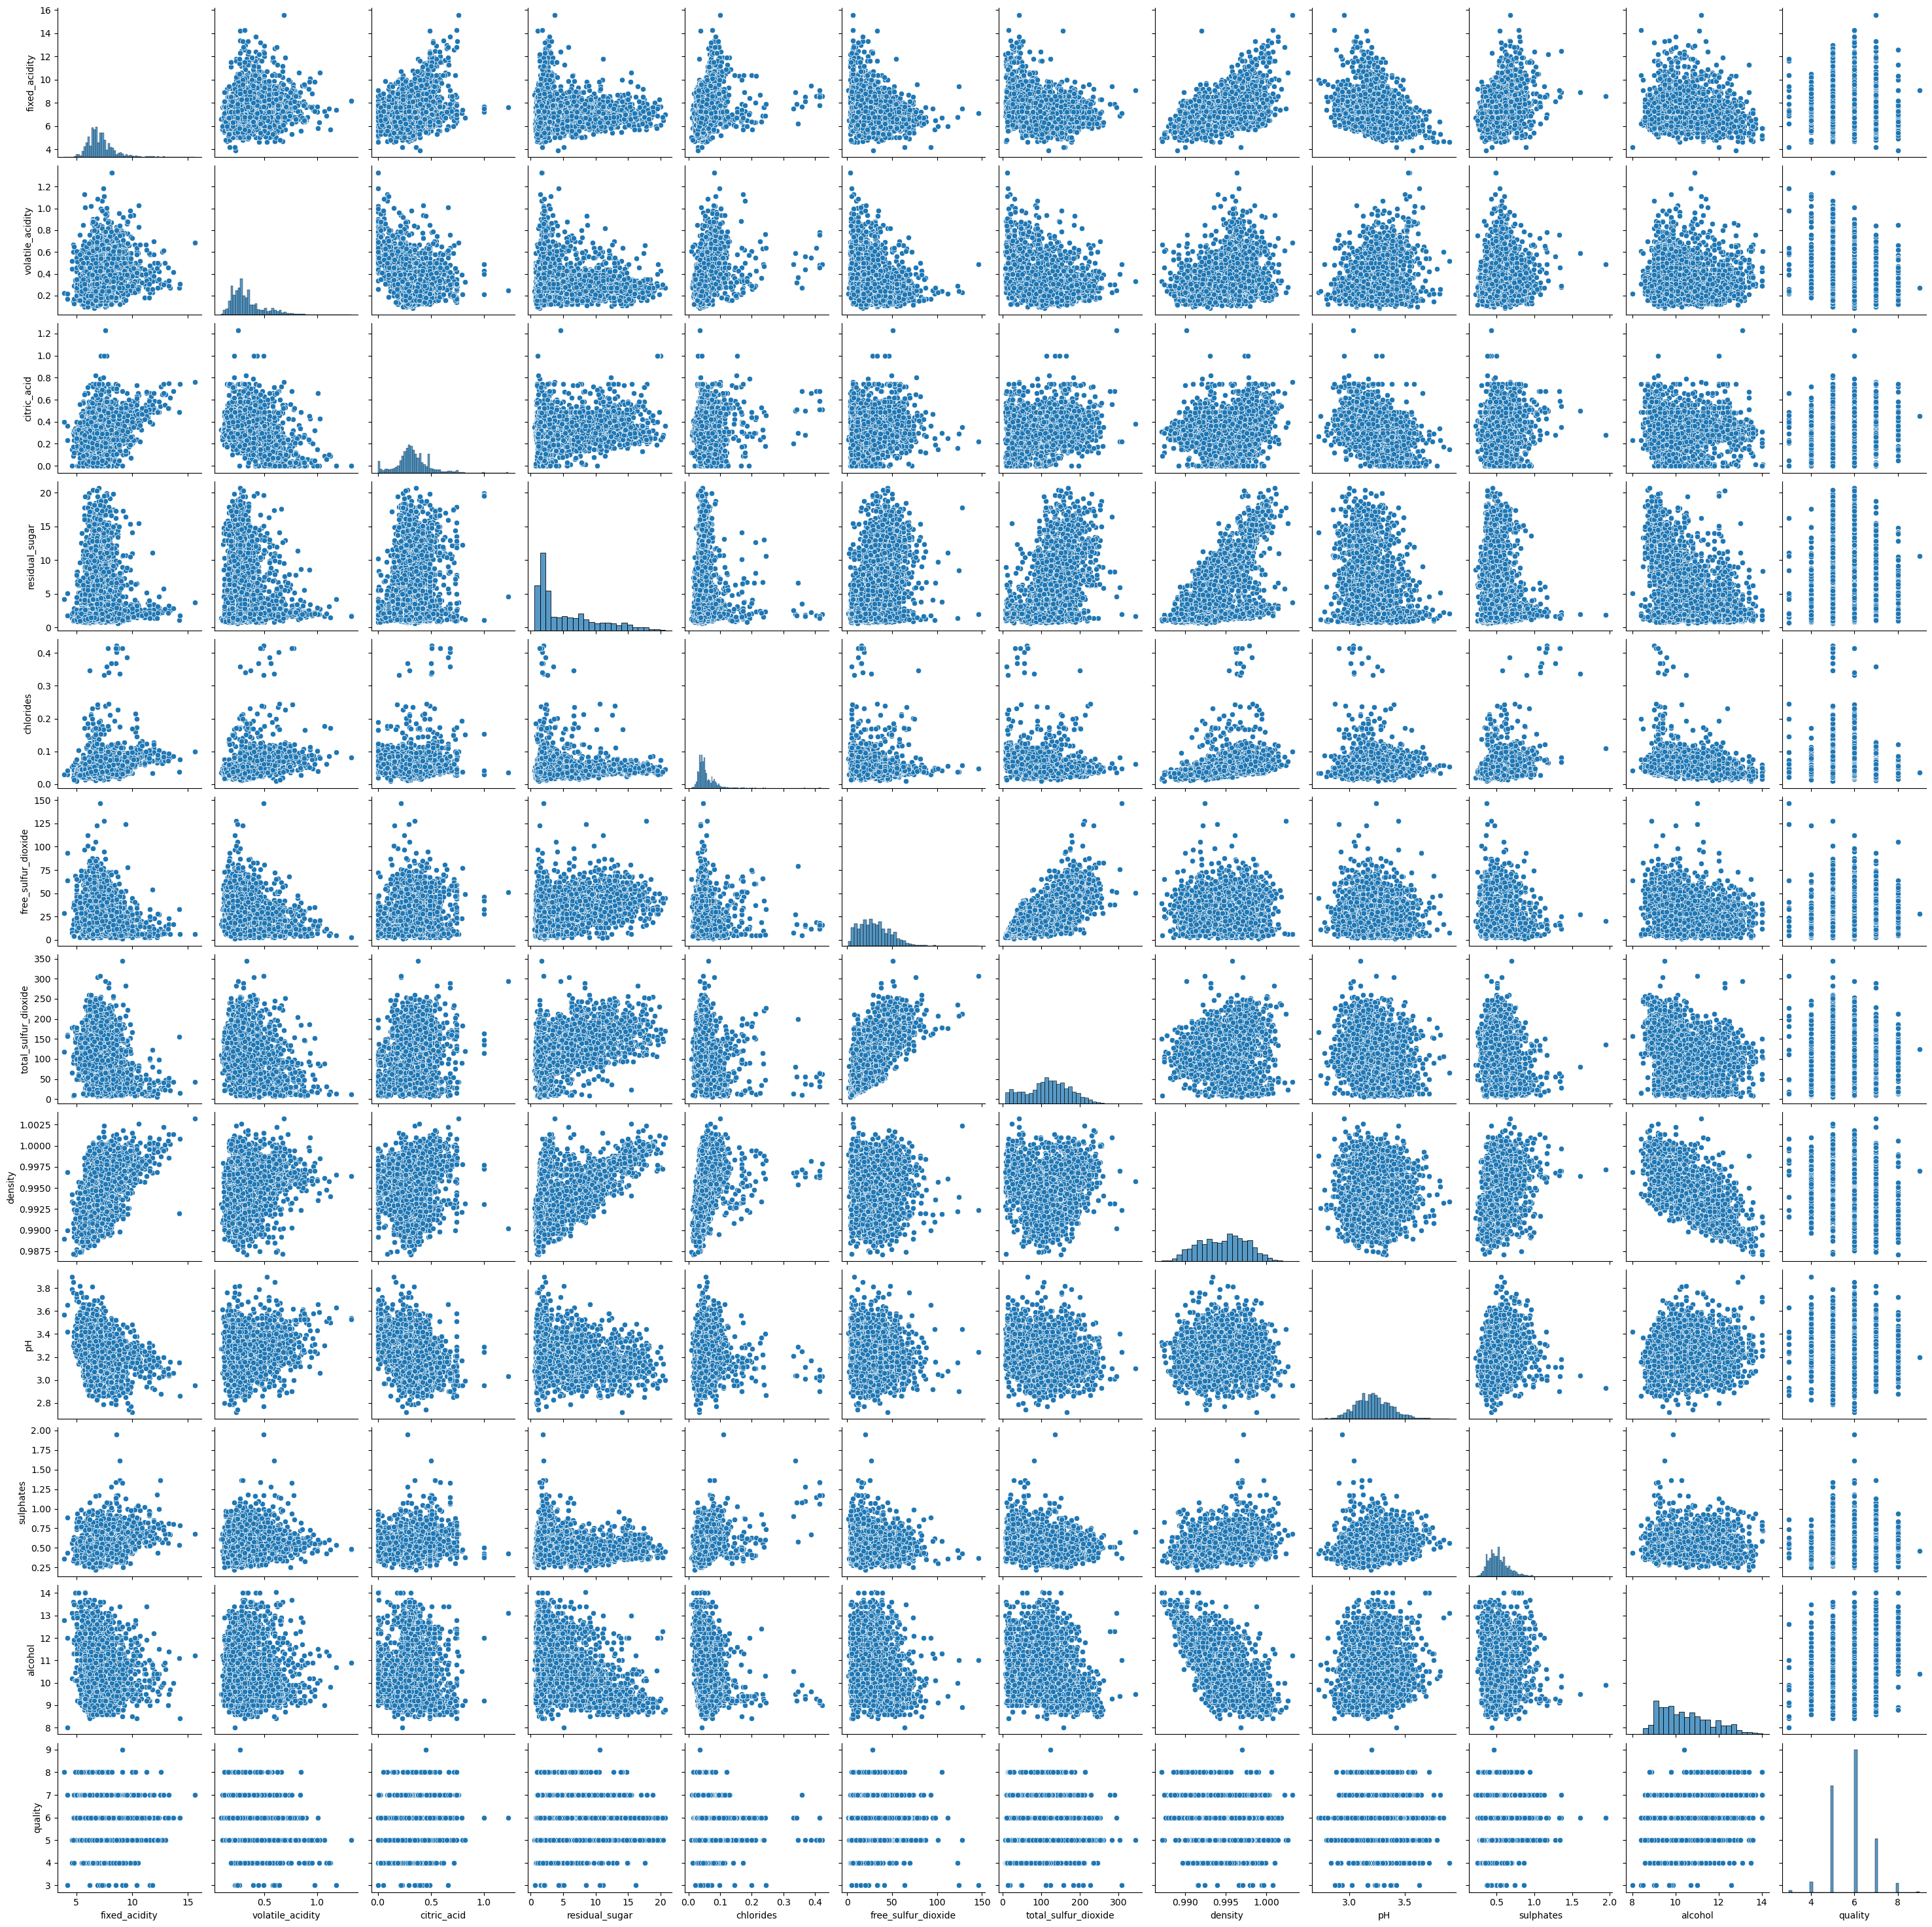

In [23]:
sns.pairplot(train)

In [43]:
# this includes split so do this earlier
# df = d.encode_and_dummies(train, 'type')

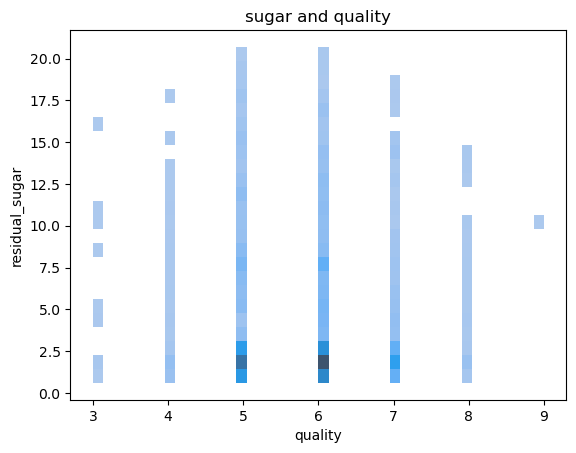

In [56]:
m.hist_plot(train, train.quality, train.residual_sugar, title= 'sugar and quality')

In [39]:
dummy_df = pd.get_dummies(train['type'])


In [45]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 3094 to 5100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   red     3118 non-null   uint8
 1   white   3118 non-null   uint8
dtypes: uint8(2)
memory usage: 95.0 KB


In [57]:
# make a copy of the dataframe that is scaled
# would need both, scaled for clustering, unscaled for plotting

In [58]:
#plot a heatmap

In [63]:
cols_to_scale = ['fixed_acidity' , 'volatile_acidity' , 'citric_acid' , 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 
train_scaled, validate_scaled, test_scaled = d.scale_cont_columns(train, validate, test, cols_to_scale, scaler_model= 1)

In [64]:
train_scaled.head()

fixed_acidity     volatile_acidity          citric_acid  \
3094                 0.32                 0.16                 0.40   
2509                 0.21                 0.20                 0.16   
4420                 0.23                 0.25                 0.37   
2677                 0.22                 0.14                 0.28   
2507                 0.35                 0.12                 0.30   

           residual_sugar            chlorides  free_sulfur_dioxide  \
3094                 0.45                 0.05                 0.30   
2509                 0.26                 0.08                 0.16   
4420                 0.28                 0.11                 0.28   
2677                 0.78                 0.10                 0.38   
2507                 0.45                 0.11                 0.15   

      total_sulfur_dioxide              density                   pH  \
3094                  0.57                 0.42                 0.35   
2509                  0.41                 0.44                 0.36   
4420                  0.70                 0.60                 0.66   
2677                  0.57                 0.83                 0.65   
2507                  0.45                 0.67                 0.51   

                sulphates              alcohol  quality   type  
3094                 0.09                 0.71        7  white  
2509                 0.24                 0.31        5  white  
4420                 0.22                 0.31        5  white  
2677                 0.12                 0.30        5  white  
2507                 0.14                 0.30        4  white

In [76]:
X = train_scaled[['fixed_acidity' , 'volatile_acidity', 'alcohol']]

kmeans = KMeans(n_clusters= 3)
kmeans.fit(X)

train_scaled['acid_alc_cluster'] = kmeans.predict(X)

cluster = train_scaled.acid_alc_cluster

In [79]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


fixed_acidity     volatile_acidity              alcohol
0                 0.25                 0.17                 0.63
1                 0.26                 0.15                 0.27
2                 0.38                 0.41                 0.33

KeyError: 'quality'

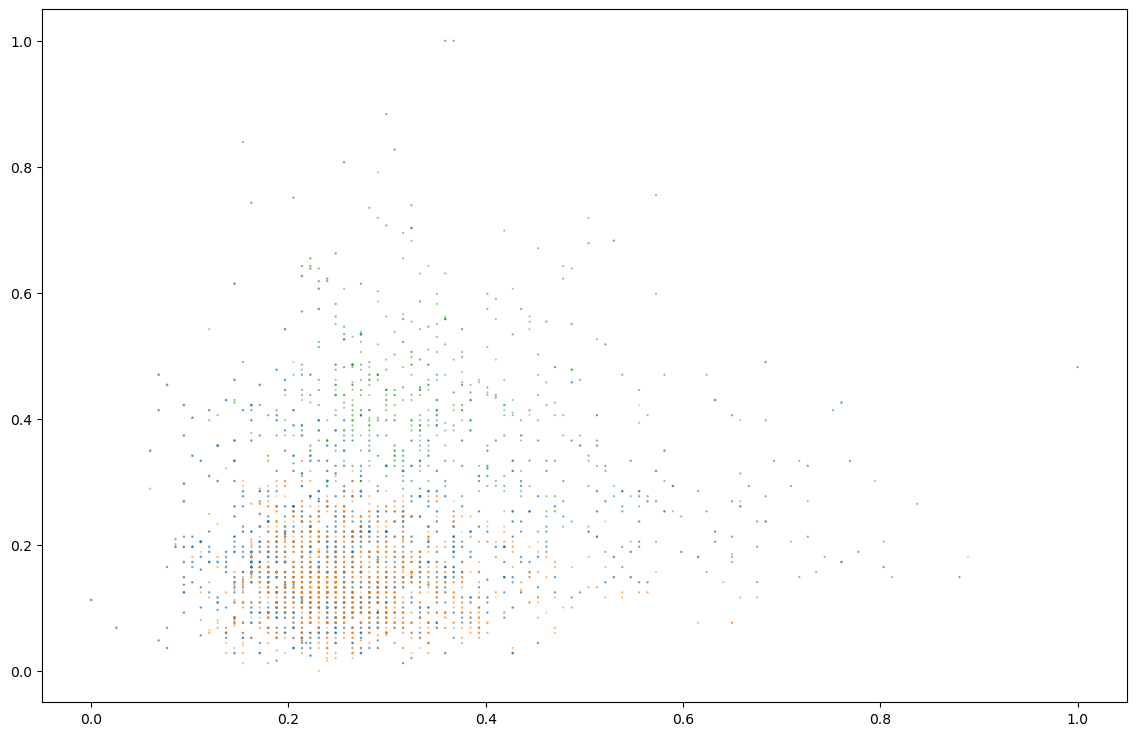

In [80]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('acid_alc_cluster'):
    plt.scatter(subset.fixed_acidity, subset.volatile_acidity, subset.alcohol, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='quality', x='fixed_acidity', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')


In [70]:
train_scaled

fixed_acidity     volatile_acidity          citric_acid  \
3094                 0.32                 0.16                 0.40   
2509                 0.21                 0.20                 0.16   
4420                 0.23                 0.25                 0.37   
2677                 0.22                 0.14                 0.28   
2507                 0.35                 0.12                 0.30   
...                   ...                  ...                  ...   
4447                 0.23                 0.18                 0.06   
2468                 0.29                 0.12                 0.24   
1996                 0.21                 0.09                 0.33   
5431                 0.25                 0.18                 0.15   
5100                 0.24                 0.12                 0.29   

           residual_sugar            chlorides  free_sulfur_dioxide  \
3094                 0.45                 0.05                 0.30   
2509                 0.26                 0.08                 0.16   
4420                 0.28                 0.11                 0.28   
2677                 0.78                 0.10                 0.38   
2507                 0.45                 0.11                 0.15   
...                   ...                  ...                  ...   
4447                 0.04                 0.06                 0.37   
2468                 0.03                 0.07                 0.25   
1996                 0.04                 0.07                 0.23   
5431                 0.14                 0.19                 0.20   
5100                 0.39                 0.08                 0.28   

      total_sulfur_dioxide              density                   pH  \
3094                  0.57                 0.42                 0.35   
2509                  0.41                 0.44                 0.36   
4420                  0.70                 0.60                 0.66   
2677                  0.57                 0.83                 0.65   
2507                  0.45                 0.67                 0.51   
...                    ...                  ...                  ...   
4447                  0.41                 0.31                 0.37   
2468                  0.27                 0.34                 0.40   
1996                  0.30                 0.28                 0.63   
5431                  0.37                 0.37                 0.09   
5100                  0.35                 0.47                 0.53   

                sulphates              alcohol  quality   type  \
3094                 0.09                 0.71        7  white   
2509                 0.24                 0.31        5  white   
4420                 0.22                 0.31        5  white   
2677                 0.12                 0.30        5  white   
2507                 0.14                 0.30        4  white   
...                   ...                  ...      ...    ...   
4447                 0.12                 0.33        5  white   
2468                 0.28                 0.35        6  white   
1996                 0.16                 0.56        6  white   
5431                 0.13                 0.26        5  white   
5100                 0.17                 0.48        6  white   

      acid_alc_cluster  
3094                 0  
2509                 1  
4420                 1  
2677                 1  
2507                 1  
...                ...  
4447                 1  
2468                 1  
1996                 0  
5431                 1  
5100                 0  

[3118 rows x 14 columns]

<AxesSubplot:xlabel='alcohol', ylabel='fixed_acidity'>

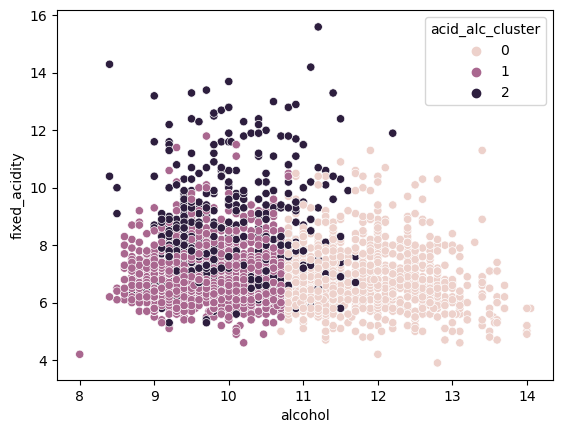

In [81]:
cluster_1 = sns.scatterplot(x = train.alcohol, y = train.fixed_acidity, hue = train_scaled.acid_alc_cluster)
cluster_1

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

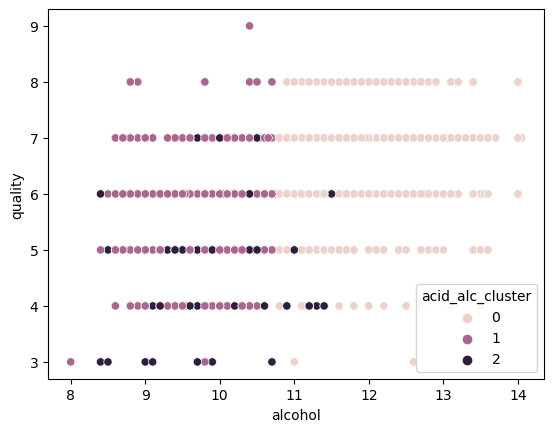

In [82]:
cluster_1 = sns.scatterplot(x = train.alcohol, y = train.quality, hue = train_scaled.acid_alc_cluster)
cluster_1

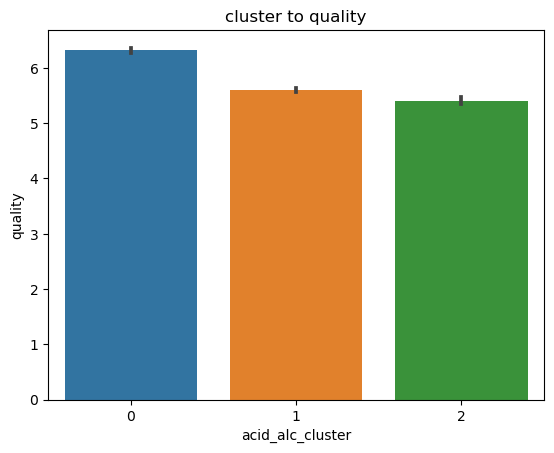

In [75]:
m.bar_chart(train_scaled, train_scaled.acid_alc_cluster, train_scaled.quality, 'cluster to quality')